<a href="https://colab.research.google.com/github/Rodzeymer/Imersao_Python/blob/main/Imers%C3%A3o_Python_Aula_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# Carregar as bibliotecas padrão, pode ser que nessa parte não tenha a mplfinance,
# logo vamos primeiro importar as que já temos instaladas por padrão.

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [45]:
# Agora vamos instalar a mplfinance e importar ela, okidoki.

!pip install mplfinance
import mplfinance as mpf

In [129]:
# Desta vez não vamos trabalhar com arquivos, vamos trabalhar com dados coletados pela internet,
# nesse caso o preço das ações da petrobrás, usando a lib Yahoo Finance, uma API que permite
# pegarmos os dados das ações no mercado de valores, atuais e séries históricas, e trabalhar nelas.

# Aqui pegamos os dados da PETR4.SA no ano de 2023 todo, de primeiro de janeiro a 31 de dezembro.

dados = yf.download("PETR4.SA", start="2023-01-01", end="2023-12-31")

[*********************100%%**********************]  1 of 1 completed


In [130]:
# Aqui renomeamos todas as colunas, como não selecionamos algumas, pegamos todas, vamos ter que renomeá-las,
# todas e na ordem que aparecem, inclusive renomeando o ídice para data.

dados.columns = ["Abertura", "Maximo", "Minimo", "Fechamento", "Fech_Ajust", "Volume"]
dados = dados.rename_axis("Data")

In [ ]:
# Vamos construir nosso primeiro gráfico,a lib matplotlib permite criar gráficos simples,
# mas vamos ver que para alguns usos, como no mercado financeiro, esse gráfico é muito simples, vamos usar ao
# final o chamado gráfico de velas, ou candlestick, que para cada ponto no gráfico são representados 4 informações,
# a abertura, máximo, mínimo e fechamento, de cada dia, então é muita informação pra tão simples gráfico.

dados["Fechamento"].plot(figsize=(10,6))
plt.title("Variação do preço por data", fontsize=20)
plt.legend(["Fechamento"])

In [132]:
# Aqui definimos como nosso dataframe as primeiras 60 linhas dos dados coletados pela API,
# então definimos como índice a data e a transformamos em número de dias padrão de máquina.

df= dados.head(60).copy()
df['Data'] = df.index
df['Data'] = df['Data'].apply(mdates.date2num)

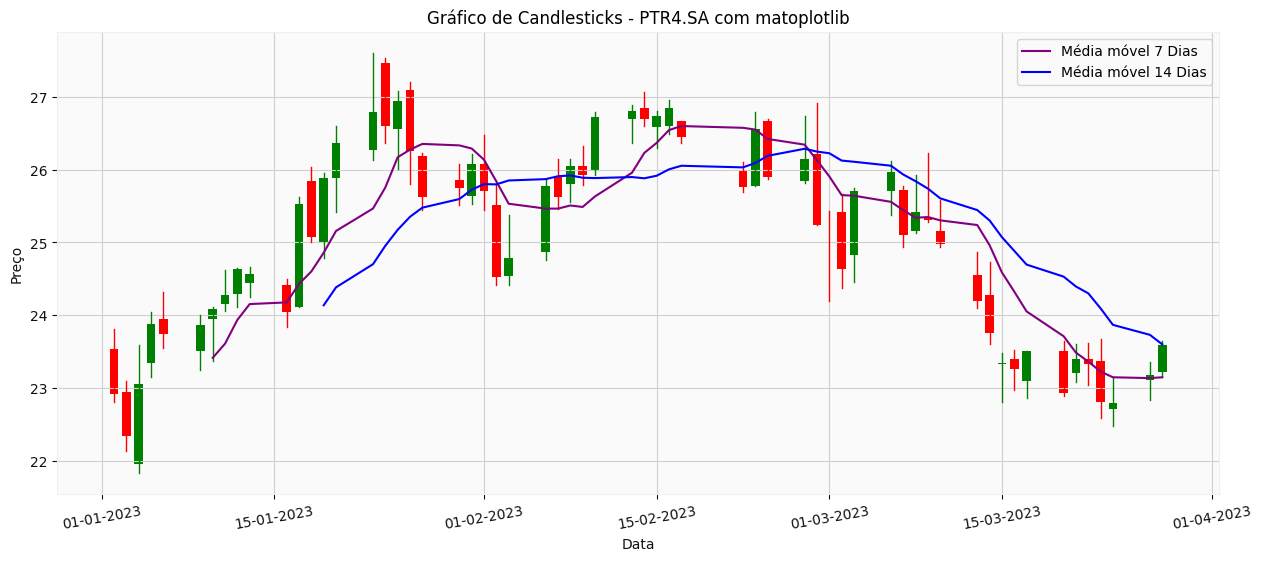

In [133]:
# Vamos começar a fazer gráficos mais complexos, com o uso de um pouco de programação,, vamos pegar
# os dias em que o fechamento foi maior que a abertura, dia de alta, e colocar a cor verde e nos dias
# de baixa colocar a cor vermelha. Logo em seguida vamos usar os dados de data, mínimo e máximo para
# determinar as coordenadas no gráfico, gerando linhas verticais, primeiro ponto (data, mínimo),
# segundo ponto (data, máximo) e desenhar uma linha entre eles, cuja cor será definida se teve alta ou
# baixa nesse dia. E depois plotar o retângulo do candlestick, centralizado na linha e cujo tamanho
# acompanhe o tamanho da alta e da baixa.

fig, ax = plt.subplots(figsize=(15,6))

width = 0.7

for i in range(len(df)):
  if df["Fechamento"].iloc[i] > df["Abertura"].iloc[i]:
    color = "green"
  else:
    color="red"

  ax.plot([df["Data"].iloc[i], df["Data"].iloc[i]],
        [df["Minimo"].iloc[i], df["Maximo"].iloc[i]],
        color = color, linewidth = 1)

  ax.add_patch(plt.Rectangle((df["Data"].iloc[i] - width/2,
                              min(df["Abertura"].iloc[i], df["Fechamento"].iloc[i])),
                           width, abs(df["Fechamento"].iloc[i] - df["Abertura"].iloc[i]),
                             facecolor = color))

# Os candlesticks foram feitos, agora vamos trabalhar nas linhas de médias móveis, de 7 e 14 dias,
# para isso vamos usar a função rolling com a média, definimos a quantidade de dias que cada linha
# vai usar e definir cores e a legenda para ser exibida, em princípio temos nosso gráfico pronto.


df['MA7'] = df["Fechamento"].rolling(window = 7).mean()
df['MA14'] = df["Fechamento"].rolling(window = 14).mean()

ax.plot(df["Data"], df["MA7"], color = 'purple', label="Média móvel 7 Dias")
ax.plot(df["Data"], df["MA14"], color = 'blue', label="Média móvel 14 Dias")
ax.legend()

# Mas há elementos gráficos que podem ser incorporados, como a data correta, sair da data de máquina,
# o título do gráfico e os rótulos dos eixos e as linhas de grade, agora sim um gráfico bem feito

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.xticks(rotation = 10)
plt.title("Gráfico de Candlesticks - PTR4.SA com matoplotlib")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.grid(True)
plt.show()

In [85]:
# Mas tem um jeito mais simples de fazer esse tipo de gráfico, com as libs plotly.graph_objects e
# plotly.subplots conseguimos em poucas linhas criar um gráfico ainda melhor que o anterior.

# Para isso vamos chamar a função, colocando que vamos usar duas linhas e um coluna, e compartilhar os eixos,
# definimos nosso espaço vertical e os títulos, e a largura das linhas.
# Com isso pronto usamos outra função para inserir as velas, definindo seus 4 pontos,
# abertura, máximo, minimo e fechamento.

# Em seguida colocamos as linhas de média móvel, aproveitando as variáveis do gráfico anterior.

# E no final um gráfico de volume de transação, acompanhando a movimentação, veja que as velas e linhas ficaram na linha 1 e o volume na 2.

fig= make_subplots (rows=2, cols=1, shared_xaxes = True, vertical_spacing=0.1,
                    subplot_titles=("Candlesticks", "Volume Transacionado"),
                    row_width=[0.2, 0.7])
fig.add_trace(go.Candlestick(x=df.index, open=df['Abertura'], high=df['Maximo'],
                             low=df["Minimo"], close=df["Fechamento"], name="Candlestick"),
              row=1, col=1)

fig.add_trace(go.Scatter(x=df.index, y=df["MA7"], mode="lines",
                        name="MA7 - Média Móvel 7 Dias"), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df["MA14"], mode="lines",
                        name="MA14 - Média Móvel 14 Dias"), row=1, col=1)

fig.add_trace(go.Bar(x=df.index, y=df["Volume"], name="Volume"), row=2, col=1)

fig.update_layout(yaxis_title = "Preço", xaxis_rangeslider_visible=False, width=1100, height=600)

fig.show()


Vamos fazer um intervalo nos códigos aqui por um momento, veja que com algumas linhas fizemos um gráfico bem inteativo, colocando o cursor do mouse em cima das velas você consegue enxergar os dados que formar a vela, ainda pode dar zoom nos gráficos para melhor visualização, podendo voltar à visualização anterior com duplo clique.

In [86]:
# Voltando aos código, vamos carregar novamente os dados da ação, e não vamos alterar nada!

dados = yf.download("PETR4.SA", start="2023-01-01", end="2023-12-31")

[*********************100%%**********************]  1 of 1 completed


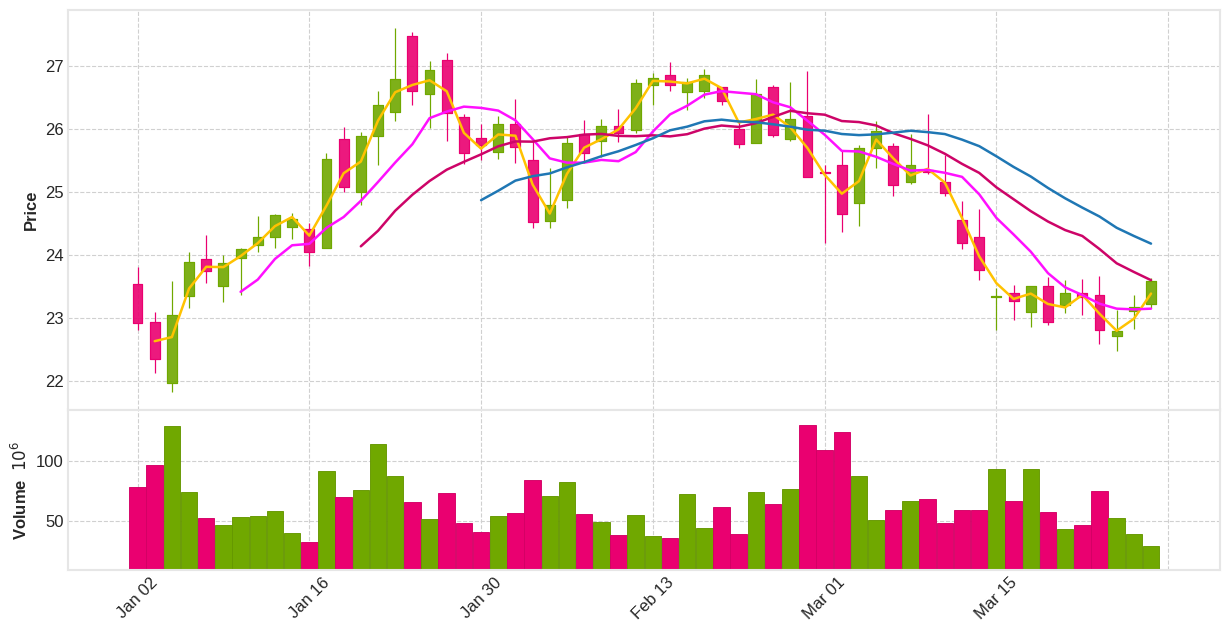

In [37]:
# Agora A MÁGICA, em apenas uma linha, vamos criar um gráfico de candlestick, usando a lib mplfinance,
# vamos definir apenas a quantidade de linhas (60), o tipo de gráfico, tamanho dele, se vamos exibir o volume
# transacionado, as linhas de médias móveis e o estilo das cores.

mpf.plot(dados.head(60), type="candle", figsize = (16,8), volume=True, mav=(7, 14), style='yahoo')

E TADAAAA, um gráfico rico, com muitas informações e de fácil criação. Mas nesse ponto temos que fazer uma reflexão, ele é muito, mas MUITO mais simples de fazer, mas acaba por ficando mais simplório, sem a interatividade das informações quando colocamos o cursor do mouse em cima das velas e sem o zoom. É uma troca, um tradeoff, menos trabalho acaba tendo um custo quanto se tem muito menos trabalho que no gráfico interativo. Mas pra uma análise inicial, uma linha de código, é mais que suficiente. A Aula 04 termina aqui, mas temos os desafios e os desafios NG+!

[*********************100%%**********************]  1 of 1 completed


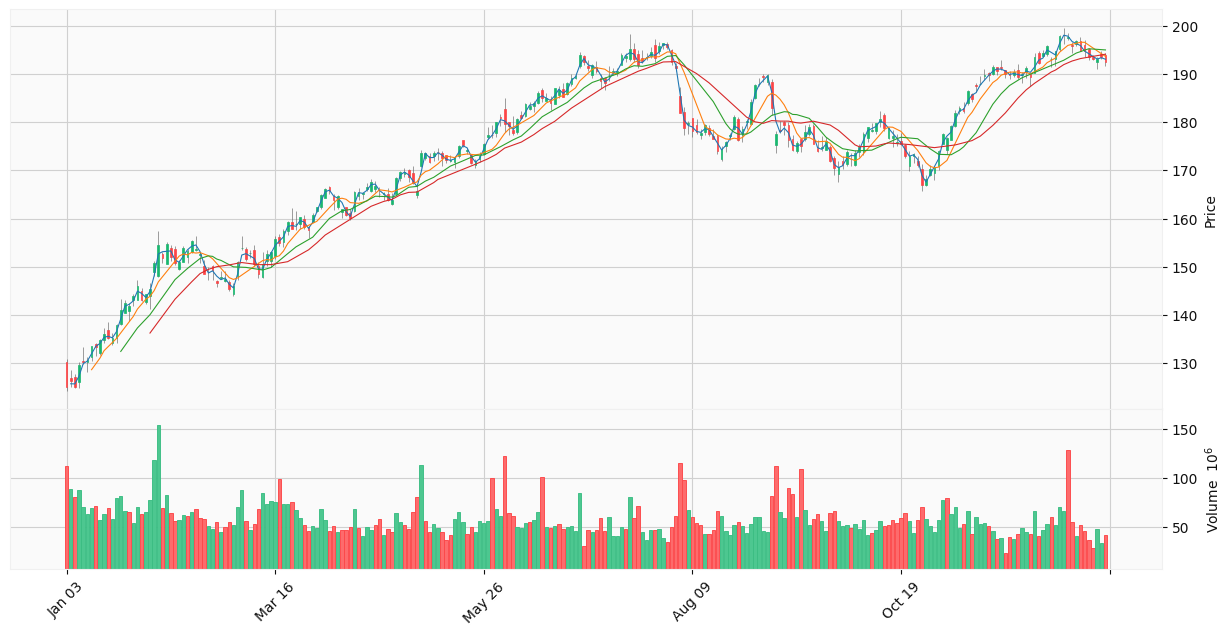

In [91]:
# Como desafio foi proposto pegar os dados da Apple e plotar o gráfico com mpf, então está aí o gráfico do ano de 2023

dados = yf.download("AAPL", start="2023-01-01", end="2023-12-31")
mpf.plot(dados.head(8765), type="candle", figsize = (16,8), volume=True, mav=(2, 7, 14, 21), style='yahoo')


[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




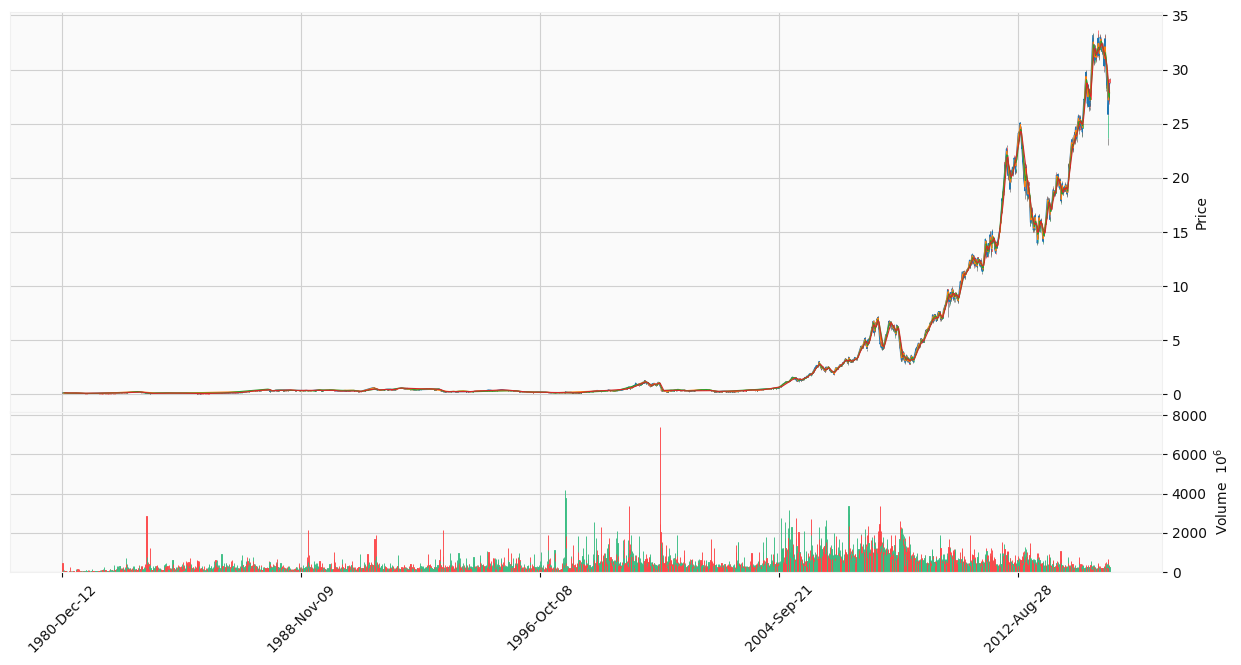

In [139]:
# Mas eu quero mais, muito mais, vamos então primeiro fazer esse mesmo gráfico,
# mas com TODOS OS DADOS da Apple, desde sua entrada no mercado de ações, em 12 de dezembro de 1980

# Ele já exibe o alerta de MUITOS DADOS, mas vamos até o fim!
# Observe esse gráfico GIGANTE!

dados_apple = yf.download("AAPL", start="1980-12-12", end="2023-12-31")
mpf.plot(dados_apple.head(8765), type="candle", figsize = (16,8), volume=True, mav=(2, 7, 14, 21), style='yahoo')

In [142]:
# Vamos além, SKYROCKET!
# Vamos fazer o gráfico interativo com a base de dados de 40 anos da Apple!

# Primeiro, renomeamos as colunas e o eixo data
dados_apple.columns = ["Abertura", "Maximo", "Minimo", "Fechamento", "Fech_Ajust", "Volume"]
dados_apple = dados_apple.rename_axis("Data")

# Copiamos os dados para um dataframe para evitar problema de número de colunas, já que vamos
# inserir as colunas da média móvel de 7, 14, 21 e 28 dias.
df=dados_apple.copy()
df['MA7'] = df["Fechamento"].rolling(window = 7).mean()
df['MA14'] = df["Fechamento"].rolling(window = 14).mean()
df['MA21'] = df["Fechamento"].rolling(window = 21).mean()
df['MA28'] = df["Fechamento"].rolling(window = 28).mean()

# Agora formatamos as duas partes do gráfico, uma com as velas e outro com o volume transacionado
fig= make_subplots (rows=2, cols=1, shared_xaxes = True, vertical_spacing=0.1,
                    subplot_titles=("Candlesticks", "Volume Transacionado"),
                    row_width=[0.2, 0.7])

# Primeiramente fazemos a configurção do candlestick, baicamente atribuímos as
# colunas aos valores solicitados pelo gráfico e sua posição.
fig.add_trace(go.Candlestick(x=df.index, open=df['Abertura'], high=df['Maximo'],
                             low=df["Minimo"], close=df["Fechamento"], name="Candlestick"),
              row=1, col=1)

# Aqui adicionamos as linhas de média móveis
fig.add_trace(go.Scatter(x=df.index, y=df["MA7"], mode="lines",
                        name="MA7 - Média Móvel 7 Dias"), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df["MA14"], mode="lines",
                        name="MA14 - Média Móvel 14 Dias"), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df["MA21"], mode="lines",
                        name="MA21 - Média Móvel 21 Dias"), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df["MA28"], mode="lines",
                        name="MA28 - Média Móvel 28 Dias"), row=1, col=1)

# E por fim, o gráfico de volume, como gráfico de barras
fig.add_trace(go.Bar(x=df.index, y=df["Volume"], name="Volume"), row=2, col=1)

fig.update_layout(yaxis_title = "Preço", xaxis_rangeslider_visible=False, width=1100, height=600)

fig.show()

Terminamos os desafios dessa quarta aula demonstrando o poder do Python com o tratamento e manipulação de dados imensos, neste último gráfico estão dispostos de forma ordenada o valor em ações da Apple nos últimos 40 anos, são dados de abertura, máximo, mínimo, fechamento e volume de transação, com 4 médias móveis calculadas de mais de 8700 dias. Quero ver o Excel fazer isso, e gerar esse gráfico interativo sem explodir um computador!